<a href="https://colab.research.google.com/github/lourencocavalcante/my-studies/blob/main/ATUAL_1_INPE_CAP351_ProjetoFinal_RNN_LSTM_Lourenco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# **CAP-351 Neurocomputação**

**Professor:**
*Dr. Marcos Goncalves Quiles*

**Aluno:**
*Lourenço José Cavalcante Neto*

---

**PROJETO FINAL:  Aplicação de uma Rede Neural Recorrente (RNN) para predição de chuva na região amazônica com base nos dados do disdrômetro RD80, instalado no sítio Campina, próximo à torre ATTO**

**Um projeto de ML com EDA e modelo que ajuda a prever a chuva do dia seguinte treinando modelos de classificação na variável de destino RainTomorrow**


2. Predição. Treinar um modelo para predizer o valor de uma variável no instante **t+k**. O modelo deve receber os dados da série temporal (instantes anteriores a **t** – verificar tamanho da janela) e predizer um favor futuro. **k** a distância da predição. *Por exemplo, podemos alimentar um modelo com dados de uma dada empresa (i.e. **PETR3**) e tentar predizer qual será o valor da ação daqui **5 dias (k==5)**.*


# **Descrição do problema**
Este conjunto de dados contém cerca de 2 anos de observações meteorológicas diárias oriundos de dois equipamentos ( Radiômetro de Microondas MP3000A e o Disdrômetro RD80) instalados nas proximidades da torre ATTO, em sítio chamado Campina, na região amazônica.

Rain Intensity é a variável de destino na qual será utilizada para predizer a chuva. Significa - choveu no dia seguinte, sim ou não? Esta coluna é Sim se a chuva naquele dia foi maior que 0.1 mm/h.

# **Objetivo**
O presente trabalho tem por objetivo implementar e treinar um modelo de rede neural **LSTM (Long Short Term Memory)** para predição de chuva com base nos dados do disdrômetro **RD80**. Este equipamento mede adistribuição das gotas de chuva que chegam à superfície. O modelo computacional contribuirá coma a capacidade de antecipar informações sobre "estar chovendo" ou "não".

# **Introdução**
Para o desenvolvimento do presente trabalho, inicialmente partirei de uma breve visualização dos dados do nosso Dataset. Em seguida, será implementado e treinando um modelo LSTM, tal qual será utilizado para predizer a ocorrência de chuva.

# **Recurrent Neural Network (RNN)**
Uma (RNN) é uma classe de redes neurais que inclui conexões ponderadas dentro de uma camada. Como as RNNs incluem loops, elas podem armazenar informações ao processar novas entradas. Essa memória os torna ideais para tarefas de processamento onde as entradas anteriores devem ser consideradas (no nosso caso, dados da série temporal). 

**Long Short Term Memory (LSTM)**

Em resumo, uma célula LSTM pode aprender a reconhecer uma entrada importante (que é o papel do input gate), armazená-la no estado de longo prazo, aprender a preservá-la pelo tempo necessário (esse é o papel do forget gate) e aprender a extraí-la sempre que for preciso. Isso explica por que elas têm sido surpreendentemente bem-sucedidas em capturar padrões de longo prazo em séries temporais.

<img src="https://github.com/lourencocavalcante/Neurocomputacao/blob/1494f13955de226380c002fe2774d8641ca2efc6/Figuras/RNN_LSTM.png?raw=true" width = 600 align="left">


# **Bibliotecas/Pacotes**

In [ ]:
import pandas as pd
import seaborn as sns

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
#from keras.optimizers import Adam, SGD
from math import sqrt
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
import numpy

import datetime
import time
import math
import calendar


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


# **Dataset**

Os Dados são de um equipamento chamado Disdrômetro RD80 (também conhecido como Joss), instalado próximo à torre ATTO, em um sítio chamado Campina, na região amazônica, nos quais foram adquiridos e salvos no google Drive. Este equipamento mede a distribuição das gotas de chuva que chegam à superfície.  Os dados são referente ao período de **17/03/2020** à **29/06/2022**,

**Importação, formatação, tratamento e visualização dos dados**

In [ ]:
#Vamos baixar os dados do Google Drive para o ambiente de execução do nosso Notebook
!gdown --id 1vV99gFuJ7i8MXXjFhEAsF3w1988ZNTQ_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vV99gFuJ7i8MXXjFhEAsF3w1988ZNTQ_
To: /content/df_MP3000A_RD80_final-2022.csv
100% 66.3M/66.3M [00:00<00:00, 87.8MB/s]


In [ ]:
#Carregar o Dataset e criar o Dataframe
df_MP3000A_RD80 = pd.read_csv("/content/df_MP3000A_RD80_final-2022.csv",parse_dates=[0], index_col=[0])
df_MP3000A_RD80_final = pd.DataFrame(df_MP3000A_RD80)



In [ ]:
df_MP3000A_RD80_final= df_MP3000A_RD80_final.query("(Datetime >= '2022-05-1' and Datetime <= '2022-05-31' and DataQuality == 1)")

#Aqui verificamos o tamanho do Dataset e quantidade de atributos 
print('Tamanho do dataset: ',df_MP3000A_RD80_final.shape[0], ' - Quantidade de atributos: ', df_MP3000A_RD80_final.shape[1])

Tamanho do dataset:  141218  - Quantidade de atributos:  49


**Pré-processamento e visualização os dados**

O primeiro passo é abrir o CSV com o Pandas. Em uma visão inicial dos dados, temos:

In [ ]:
#Vamos visualizar somente as primeiras e as ultimas 2 linhas
df_MP3000A_RD80_final.head(n=2).append(df_MP3000A_RD80_final.tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
64721,2022-05-10 00:04:19,2022-05-10,2022,May,Tuesday,00:04:19,Night,0.0,0.0,0.0,...,0.000,0.00,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
64722,2022-05-10 00:04:48,2022-05-10,2022,May,Tuesday,00:04:48,Night,0.0,0.0,0.0,...,0.000,0.00,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
203603,2022-05-30 19:42:08,2022-05-30,2022,May,Monday,19:42:08,Evening,0.0,0.0,0.0,...,6.418,0.13,2.25,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
203604,2022-05-30 19:42:11,2022-05-30,2022,May,Monday,19:42:11,Evening,0.0,0.0,0.0,...,0.000,0.00,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu


Como podemos ver, o tamanho do nosso Dataset é de 315.420 e isso pode ocasionar um custo computacional muito alto durante os experimentos e testes do Projeto, a depender do tipo de projeto. Vamos criar um mecânismo para, caso necessário, possamos reduzir os dados para o tamanh do nosso interesse.

In [ ]:
#Definindo uma parte do Dataset para usá-lo neste Projeto
limit_date = datetime.datetime(year=2022, month=5,day=1)

df_MP3000A_RD80_final = df_MP3000A_RD80_final.set_index('Datetime')

df_MP3000A_RD80_final = df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final.index >= str(limit_date)]

df_MP3000A_RD80_final.reset_index(inplace=True)

print('Tamanho do Dataset que será utilizado: ', df_MP3000A_RD80_final.shape[0])

Tamanho do Dataset que será utilizado:  141218


In [ ]:
#Vamos visualizar os dados novamente
df_MP3000A_RD80_final.head(n=2).append(df_MP3000A_RD80_final.tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
0,2022-05-10 00:04:19,2022-05-10,2022,May,Tuesday,00:04:19,Night,0.0,0.0,0.0,...,0.000,0.00,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
1,2022-05-10 00:04:48,2022-05-10,2022,May,Tuesday,00:04:48,Night,0.0,0.0,0.0,...,0.000,0.00,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
141216,2022-05-30 19:42:08,2022-05-30,2022,May,Monday,19:42:08,Evening,0.0,0.0,0.0,...,6.418,0.13,2.25,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
141217,2022-05-30 19:42:11,2022-05-30,2022,May,Monday,19:42:11,Evening,0.0,0.0,0.0,...,0.000,0.00,0.00,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu


Após ajustes, vamos visualizar novamente as as colunas do Dateset

In [ ]:
df_MP3000A_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'],
      dtype='object')

No **df_MP3000A_final**, a **unidade de medida** dos canais Ch 22.234, Ch 22.500, Ch 23.034, Ch 23.834, Ch 25.000, Ch 26.234, Ch 28.000, Ch 30.000, Ch 51.248, Ch 51.760, Ch 52.280, Ch 52.804, Ch 53.336, Ch 53.848, Ch 54.400, Ch 54.940, Ch 55.500, Ch 56.020, Ch 56.660, Ch 57.288, Ch 57.964, Ch 58.800 é em **K (Kelvin**). Assim como é para **Tamb** e **Tir**. Vamos aplicar a conversão de **K (Kelvin)** para **°C (Celsius)**.

In [ ]:
#Mudando os formato para (float)
df_MP3000A_RD80_final[['Tamb_K', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800']] = df_MP3000A_RD80_final[['Tamb_K', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800']].astype(float)

In [ ]:
#Conversão de Kelvin(K) para Celcius(°C)
convert_k_c = ['Tamb_K', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800']

for k_c in range(0, len(convert_k_c)):
  df_MP3000A_RD80_final[convert_k_c[k_c]][df_MP3000A_RD80_final[convert_k_c[k_c]] != 0] = (df_MP3000A_RD80_final[convert_k_c[k_c]])-273.15


In [ ]:
df_MP3000A_RD80_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141218 entries, 0 to 141217
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Datetime                    141218 non-null  object 
 1   Date                        141218 non-null  object 
 2   Year                        141218 non-null  int64  
 3   Month                       141218 non-null  object 
 4   Day_of_week                 141218 non-null  object 
 5   Time                        141218 non-null  object 
 6   session                     141218 non-null  object 
 7   Rain_Intensity_mm_h         141218 non-null  float64
 8   radar_reflectivity_1_mm6m3  141218 non-null  float64
 9   Liquid_watercontent_g_m3    141218 non-null  float64
 10  Mean_weight_diameter_mm     141218 non-null  float64
 11  Time_integration_s          141218 non-null  float64
 12  DataQuality                 141218 non-null  float64
 13  Tamb_K        

**Exploração de dados**

In [ ]:
df_MP3000A_RD80_final_subdivs = df_MP3000A_RD80_final['Class_Rain'].unique()
df_MP3000A_RD80_final_subdivs

array(['Não choveu', 'Chuva fraca', 'Chuva moderada', 'Chuva muito forte',
       'Chuva forte'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f227f181650>]],
      dtype=object)

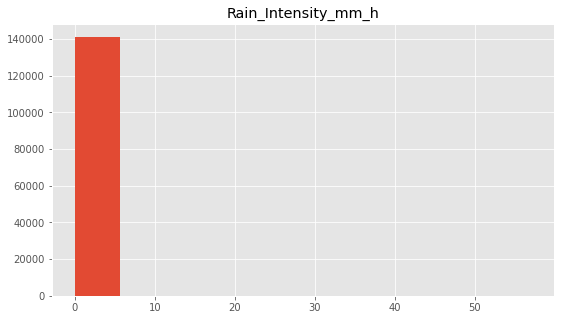

In [ ]:
df_MP3000A_RD80_final[['Rain_Intensity_mm_h']].hist(figsize=(9,5))

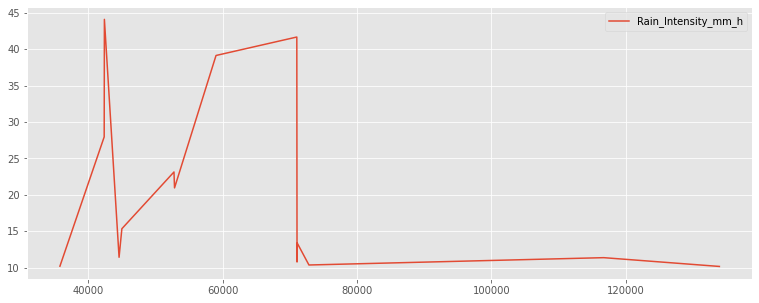

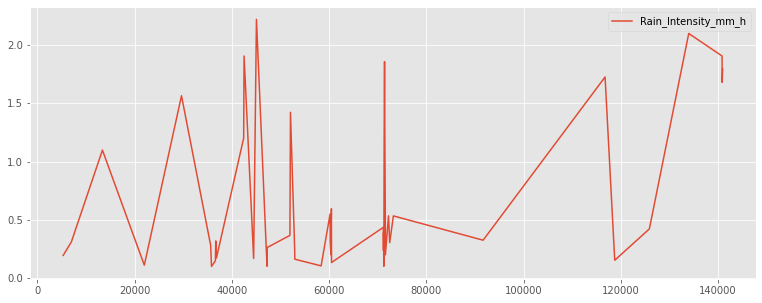

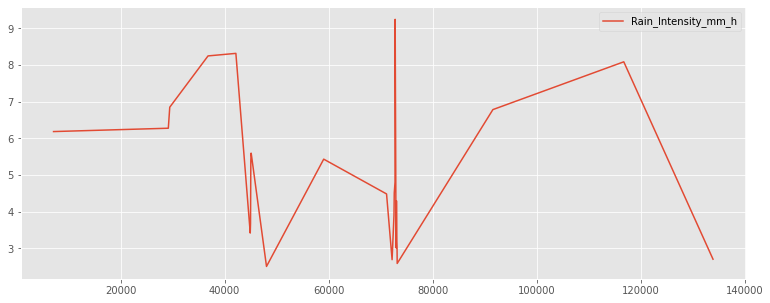

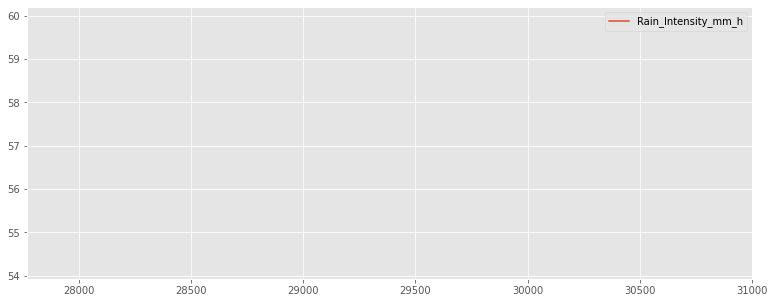

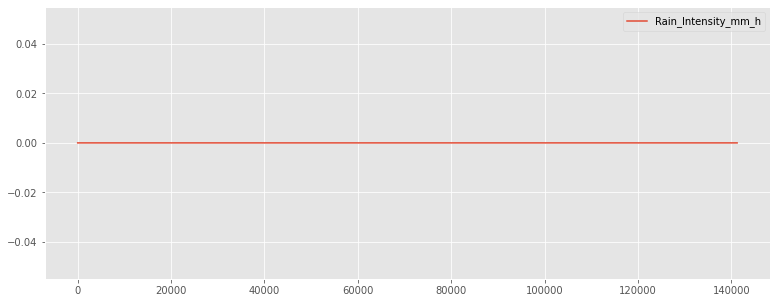

In [ ]:
variation_jun_sep = df_MP3000A_RD80_final.groupby('Class_Rain')[['Rain_Intensity_mm_h']].plot(figsize=(13,5))

In [ ]:
max_min = df_MP3000A_RD80_final.groupby('session').sum()[['Rain_Intensity_mm_h']].sort_values(by = 'Rain_Intensity_mm_h', ascending = False)
max_min

,Rain_Intensity_mm_h
session,
Evening,182.26406
Morning,140.64899
Afternoon,111.64581
Night,79.64131


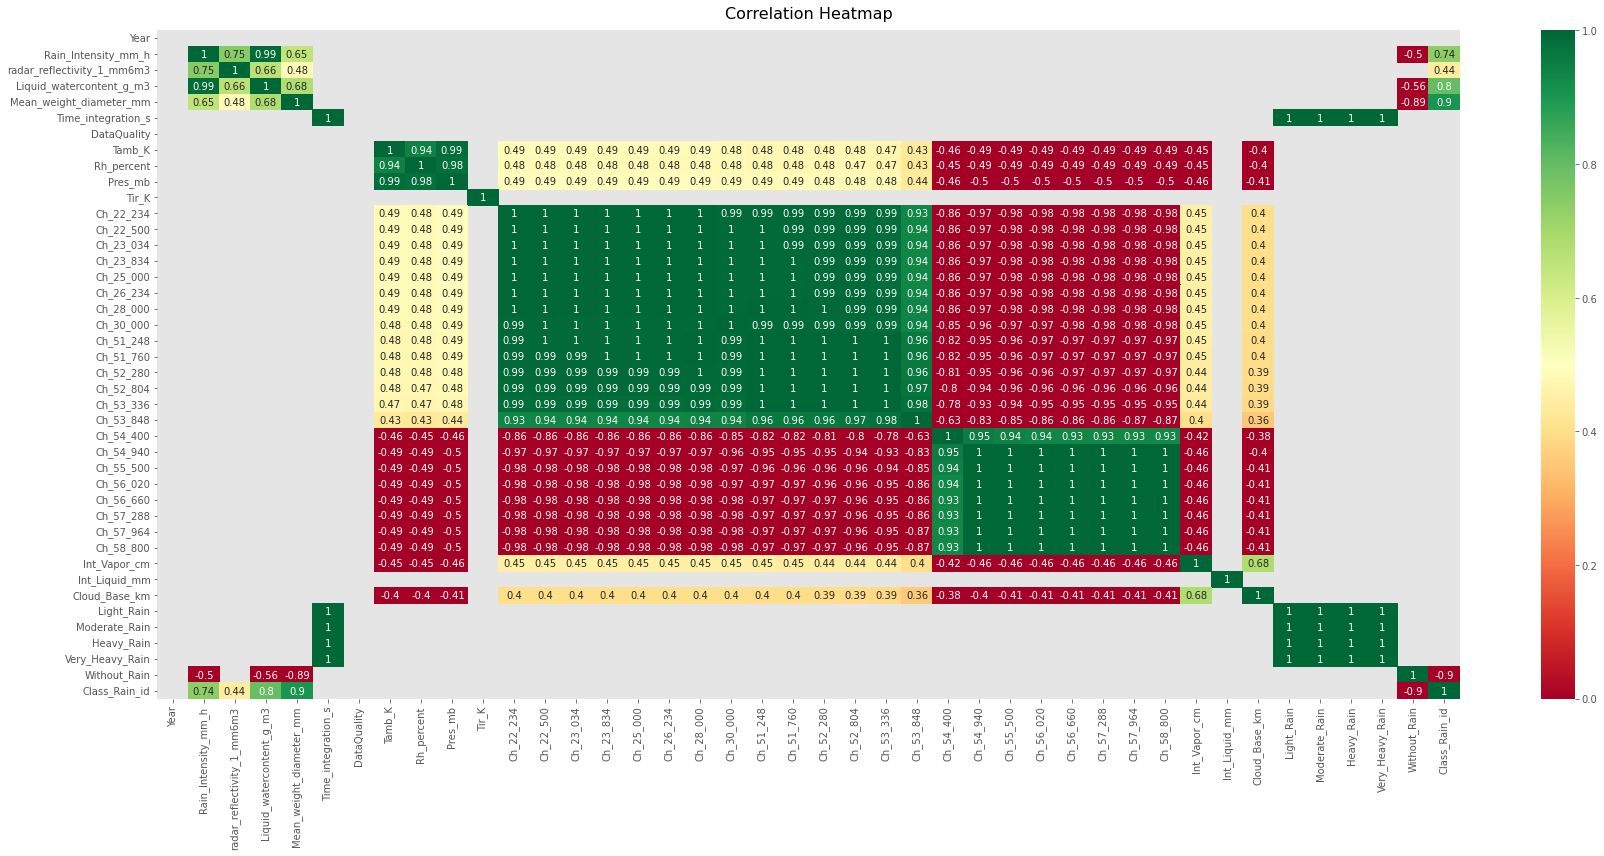

In [ ]:
corr = df_MP3000A_RD80_final.corr()

plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)], vmin=0, vmax=1, annot=True, cmap = 'RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
plt.tight_layout()
plt.savefig('heatmap1.png')
plt.show()

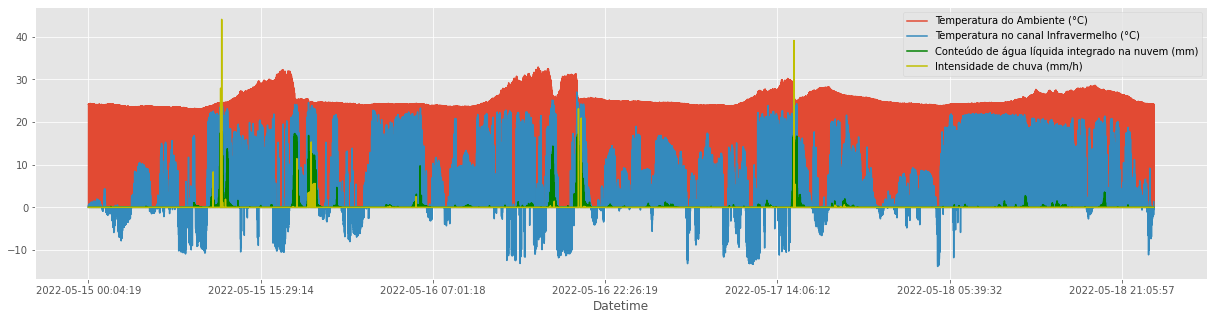

In [ ]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter_MP3000A_RD80_final = df_MP3000A_RD80_final.query("(Datetime >= '2022-05-15' and Datetime <= '2022-05-19' and DataQuality == 1)")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [21,5]

df_filter_MP3000A_RD80_final.plot(kind='line',x='Datetime',y="Tamb_K", label='Temperatura do Ambiente (°C)', ax=ax)
df_filter_MP3000A_RD80_final.plot(kind='line',x='Datetime',y="Tir_K", label='Temperatura no canal Infravermelho (°C)', ax=ax)
df_filter_MP3000A_RD80_final.plot(kind='line',x='Datetime',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax, color='g')
df_filter_MP3000A_RD80_final.plot(kind="line",x="Datetime",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax, color='y')

In [ ]:
#Função de análise de data e hora para carregar o Dataset
def parser(x):
    return datetime.strptime(x, '%Y/%m/%d')

In [ ]:
#Vamos selecionar apenas os valores da coluna de abertura(Open) e a Data(Date) como índice para nossa serie temporal.
df_MP3000A_RD80_final_serie=pd.Series(df_MP3000A_RD80_final['Int_Liquid_mm'].values,index=df_MP3000A_RD80_final['Datetime']) 
df_MP3000A_RD80_final_serie

Datetime
2022-05-10 00:04:19    0.000
2022-05-10 00:04:48    0.000
2022-05-10 00:04:50    0.000
2022-05-10 00:04:53    0.000
2022-05-10 00:05:22    0.000
                       ...  
2022-05-30 19:41:36    0.179
2022-05-30 19:41:38    0.000
2022-05-30 19:42:07    0.000
2022-05-30 19:42:08    0.130
2022-05-30 19:42:11    0.000
Length: 141218, dtype: float64

**Definição das funções necessárias**

In [ ]:
# criar um diferenciado df_MP3000A_RD80_final_serie
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

#transformar dados em estacionários
raw_values = df_MP3000A_RD80_final_serie.values
diff_values = difference(raw_values, 1)

# estruturar uma sequência como um problema de aprendizado supervisionado
def time_df_MP3000A_RD80_final_serie_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# transformar dados em aprendizado supervisionado
supervised = time_df_MP3000A_RD80_final_serie_to_supervised(diff_values, 1)
supervised_values = supervised.values

supervised_values



array([[ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       [ 0.   ,  0.   ],
       ...,
       [-0.179,  0.   ],
       [ 0.   ,  0.13 ],
       [ 0.13 , -0.13 ]])

**Divisão do Dataset em conjunto de Treinamento (80%)  e de Teste (20%)**

In [ ]:
limit_division = int(round((len(supervised_values)*0.2), 0)) #cálculo 20% dos dados para teste

limit_division

28243

In [ ]:
#Vamos dividir dados em conjuntos de treinamento e teste


print('Tamanho do Dataset que será utilizado: ', df_MP3000A_RD80_final.shape[0])

train, test = supervised_values[0:-limit_division], supervised_values[-limit_division:] #20%
print(f'Tamanho do conjunto de dados para Treino: {len(train)}')
print(f'Tamanho do conjunto de dados para Teste: {len(test)}')

Tamanho do Dataset que será utilizado:  141218
Tamanho do conjunto de dados para Treino: 112974
Tamanho do conjunto de dados para Teste: 28243


Vamos visualizar graficamente o conjunto de dados de Treinamento.

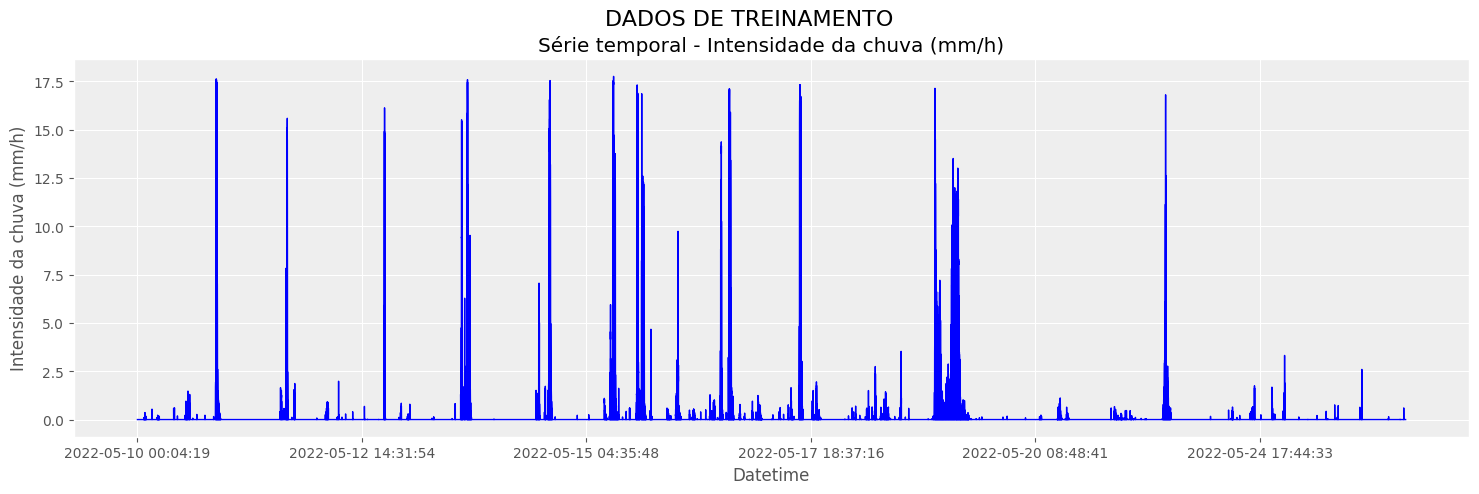

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(18,5),dpi=100)
plt.suptitle('DADOS DE TREINAMENTO', size='16')
plt.title('Série temporal - Intensidade da chuva (mm/h)')
df_MP3000A_RD80_final_serie[0:-limit_division].plot(color='#0000FF', linewidth = 1)
plt.ylabel('Intensidade da chuva (mm/h)', size=12)
ax = plt.gca()
ax.set_facecolor('#EEEEEE')
plt.grid('True')
plt.show()

**Dimensionamento dos dados**

In [ ]:
# dimensionar dados de treino e teste para [-1, 1]
def scale(train, test):
  # escalador de ajuste
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
  # transformar treino
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
  # transformar teste
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# transformar a escala dos dados
scaler, train_scaled, test_scaled = scale(train, test)

**Definições do modelo LSTM**

In [ ]:
# ajustar o modelo LSTM aos dados de treinamento
def fit_lstm(train, batch_size, nb_epoch):
    
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])

    sgd = tf.keras.optimizers.SGD(learning_rate= 0.01, momentum = 0.2)

    model = Sequential()
    #Aqui adicionamos a camada de entrada e a camada LSTM
    model.add(LSTM(units = 100, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    #Para evitar o Overfitting, podemos usar DropOut
    model.add(Dropout(0.3))
    model.add(Dense(1))
    
    #Compilando o RNN
    #model.compile(loss='mean_squared_error', optimizer='adam')
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics = ['mean_absolute_error'])

    #Ajustando o RNN ao conjunto de treinamento
    model.fit(X, y, epochs=nb_epoch, batch_size=batch_size, verbose=1, shuffle=False)
    model.summary()
    #for i in range(nb_epoch):
        #model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        #model.reset_states()
        
    return model

**Treinamento do modelo**

In [ ]:
#encaixa no modelo
qtd_batch_size = 1
qtd_epoch = 1

lstm_model = fit_lstm(train_scaled, qtd_batch_size, qtd_epoch)

#prever todo o conjunto de dados de treinamento para construir o estado para previsão
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1, verbose=1)

112974/112974 [==============================] - 130s 1ms/step - loss: 0.0034 - mean_absolute_error: 0.0117
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 100)                  40800     
                                                                 
 dropout_1 (Dropout)         (1, 100)                  0         
                                                                 
 dense_1 (Dense)             (1, 1)                    101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
112974/112974 [==============================] - 86s 760us/step


array([[0.0001248 ],
       [0.00014589],
       [0.0001639 ],
       ...,
       [0.00025738],
       [0.00025738],
       [0.00025738]], dtype=float32)

**Validação do modelo criado**

In [ ]:
# valor diferenciado invertido
def inverse_difference(history, yhat, interval=2):
    return yhat + history[-interval]

# fazer uma previsão de um passo
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    #print(yhat[0,0])
    return yhat[0,0]

#escala inversa para um valor previsto
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

#avance a validação nos dados de teste
predictions = list()
for i in range(len(test_scaled)):

    # fazer previsão de uma etapa
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1] #-1
    yhat = forecast_lstm(lstm_model, 1, X) #1

    #escala invertida
    yhat = invert_scale(scaler, X, yhat)
    
    #inverter a diferenciação
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i) #+1
    print(yhat)

    #previsão de armazenamento
    predictions.append(yhat)
    expected = raw_values[len(train) + i + 1] #+1
    print(f'Observação {i+1} -> Previsto: {yhat} - Esperado: {expected}')




A saída de streaming foi truncada nas últimas 5000 linhas.
0.004569972378667444
Observação 25744 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25745 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25746 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25747 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25748 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25749 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25750 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25751 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25752 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25753 -> Previsto: 0.004569972378667444 - Esperado: 0.0
0.004569972378667444
Observação 25754 -> Previsto: 0.00456997

## **Relatório de desempenho**

In [ ]:
# relatório de desempenho
rmse = sqrt(mean_squared_error(raw_values[-limit_division:], predictions))
mae = sqrt(mean_absolute_error(raw_values[-limit_division:], predictions))
print(f'Teste RMSE: {round(rmse, 6)}')
print(f'Teste MAE: {round(mae, 6)}')
#print('Teste MAE: %.3f' % mae)

Teste RMSE: 0.74779
Teste MAE: 0.353949


**RMSE** (Root Mean Squared Error): é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses).
**MAE** (mean Absolut Error): calcula o "erro absoluto médio" dos erros entre valores observados (reais) e predições (hipóteses)

**Gráficos de linha (observação vs previsão)**

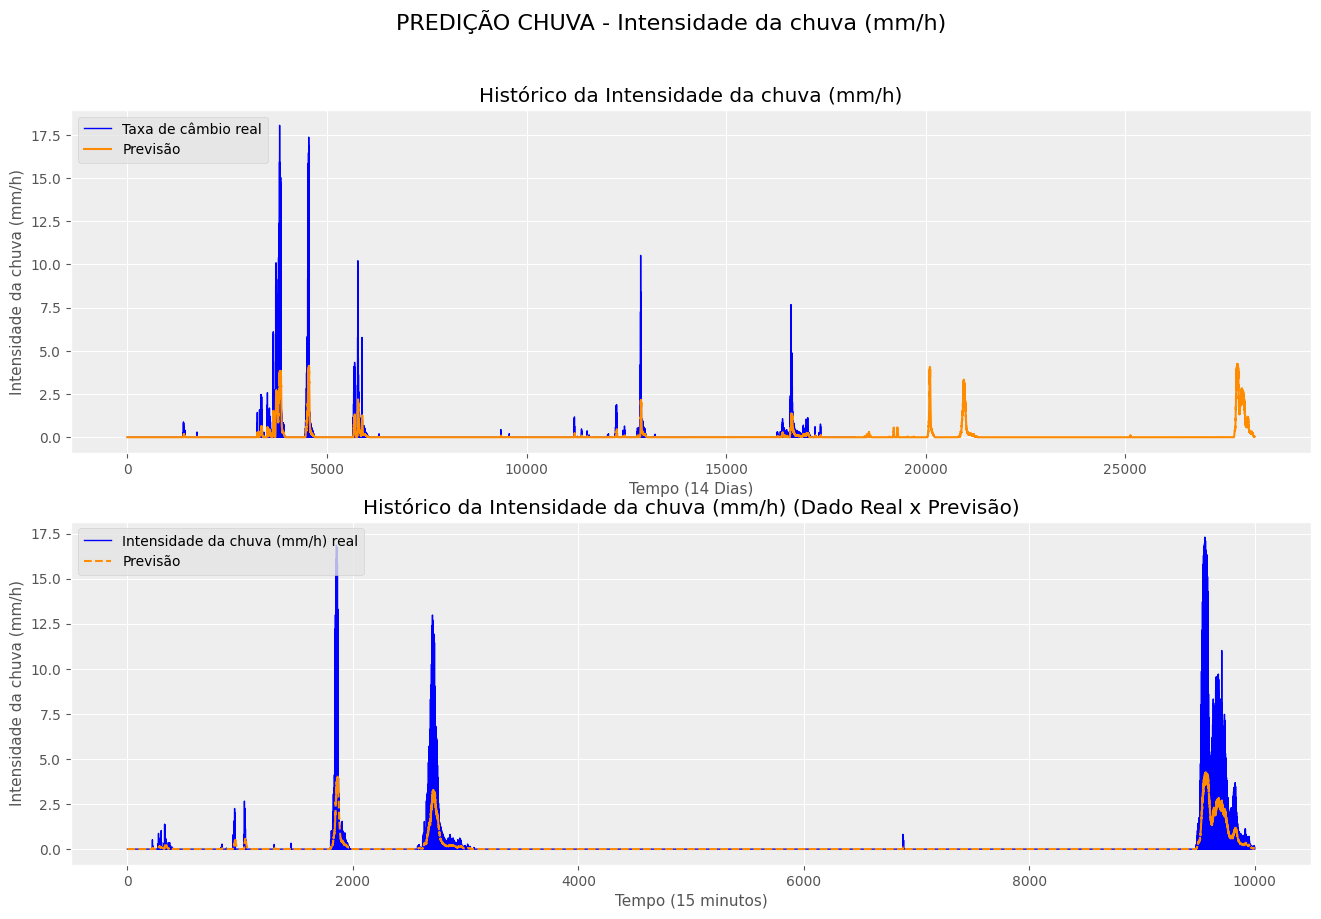

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10),dpi=100)
plt.suptitle('PREDIÇÃO CHUVA - Intensidade da chuva (mm/h)', size=16)

# gráfico de linha de observado vs previsto
plt.subplot(2,1,1)
plt.title('Histórico da Intensidade da chuva (mm/h)')
plt.plot(raw_values[-limit_division:-10000], label='Taxa de câmbio real', color='#0000FF', linewidth = 1) #, linestyle = 'dashed' Linha pontilhada
plt.plot(predictions[-limit_division:], label='Previsão', color='#FF8C00')
plt.xlabel('Tempo (14 Dias)', size=11)
plt.ylabel('Intensidade da chuva (mm/h)', size=11)
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_facecolor('#eeeeee')
plt.grid('True')

# gráfico de linha de resultado da previsão (observado vs previsto)
plt.subplot(2,1,2)
plt.title('Histórico da Intensidade da chuva (mm/h) (Dado Real x Previsão)')
plt.plot(raw_values[-10000:], label='Intensidade da chuva (mm/h) real', color='#0000FF', linewidth = 1)
plt.plot(predictions[-10000:], label='Previsão', color='#FF8C00', linestyle = 'dashed') #, linestyle = 'dashed' Linha pontilhada
plt.xlabel('Tempo (15 minutos)', size=11)
plt.ylabel('Intensidade da chuva (mm/h)', size=11)
plt.legend(loc='upper left')
ax = plt.gca()
ax.set_facecolor('#eeeeee')
plt.grid('True')

plt.show()

Como podemos ver nos gráficos acima, o modelo LSTM conseguiu acompanhar bem as tendência de movimento da taxa de câmbio analisada, nos levando a interpretar que hoive uma boa previsão de qual será a taxa de abertura nos 15 minutos seguintes. É importante destacar que esta foi apenas uma bordagem para curva de aprendizado e, caso queiramos avançar para uma implementação de um modelo para aplicação real, precisaríamos incrementar técnicas de análises mais robustas.

# **Considerações Finais**

No presente notebook, objetivou-se apresentar a implementação de um modelo de RNN - uma LSTM -, que fosse capaz de predizer a chuva. Face do Dataset utilizado e tendo como parâmetro os resultados dos testes, é possível inferir que o modelo treinado obteve resultados satifatórios. No entanto, sugere-se também que usar mais de 01 (uma) LSTM e diferentes parâmetros pode resultar em melhorias na predição da taxa.

# **Referências**

BASHEER, I. A.; HAJMEER, M. Artificial neural networks: fundamentals, computing, design, and application. Journal of Microbiological Methods, v. 43, p. 3–31, 2000

HAYKIN, Simon. Redes Neurais : princípios e prática. Traduzido por Paulo Martins Engel. 2. ed. Porto Alegre : Bookman, 2001. 900 p. il.

HSU, K. L.; GAO, X.; SOROOSHIAN, S.; GUPTA, H. V. Precipitation estimation from remotely sensed information using artificial neural networks. Journal of Applied Meteorology, v. 36, n. 9, p. 1176-1190, 1997.

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://sites.icmc.usp.br/andre/research/neural/MLP.htm

https://acervolima.com/diferenca-entre-ann-cnn-e-rnn/

KOVAKS, Z. L. Redes Neurais Artificiais: fundamentos e Aplicações. São Paulo: Acadêmica, 1996.

TAFNER, Malcon A.; XEREZ, Marcos de; RODRIGUES FILHO, Ilson W. Redes neurais artificiais : introdução e princípios de neurocomputação. Blumenau : Eko, 1995.

Hinton, Geoffrey, Nitish Srivastava, and Kevin Swersky. “Neural Networks for Machine Learning Lecture 6a Overview of Mini--Batch Gradient Descent,” 2012.